In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [2]:
df = pd.read_csv("./data/preprocessing_data.csv")
del df["Unnamed: 0"]

## Shuffle data

In [3]:
np_array = df.to_numpy()
np.random.shuffle(np_array)

In [4]:
np_array

array([[102.   ,  60.   ,  50.   ,   0.   ,   0.684],
       [108.   ,  60.   ,  30.   ,   0.   ,   0.604],
       [ 18.   ,  30.   ,  30.   ,  15.   ,   0.588],
       ...,
       [ 93.   ,  60.   ,  30.   ,  15.   ,   0.928],
       [ 84.   ,  60.   ,  50.   ,   0.   ,   0.684],
       [120.   ,  60.   ,  10.   ,   0.   ,   0.434]])

In [5]:
X = np_array[:,:-1]
y = np_array[:,-1]

## Split data (Train : Test)

In [6]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.33, random_state=42)

In [7]:
print("train_X shape :",train_X.shape)
print("test_X shape :",test_X.shape)
print("train_y shape :",train_y.shape)
print("test_y shape :",test_y.shape)

train_X shape : (412, 4)
test_X shape : (203, 4)
train_y shape : (412,)
test_y shape : (203,)


## Lasso Regression (L1-norm)

In [8]:
model_lasso = Lasso()
model_lasso.fit(X = train_X, y= train_y)
lr_pred_lasso = model_lasso.predict(X=test_X)
print("RMSE: ", np.sqrt(metrics.mean_squared_error(lr_pred_lasso, test_y)))
print("R2:", metrics.r2_score(test_y, lr_pred_lasso))

RMSE:  0.1905478929823263
R2: 0.3531791196717543


### x-axis : Real <------> y-axis : predict

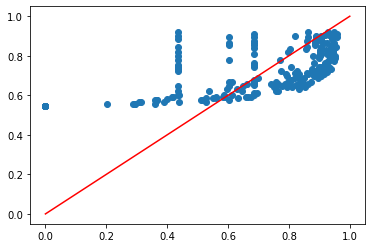

In [9]:
plt.scatter(x=test_y, y=lr_pred_lasso)
plt.plot([0,1],[0,1], color='r')
plt.show()

## Ridge Regression (L2-norm)

In [10]:
model_ridge = Ridge()
model_ridge.fit(X=train_X, y=train_y)
lr_pred_ridge = model_ridge.predict(X=test_X)
print("RMSE: ", np.sqrt(metrics.mean_squared_error(lr_pred_ridge, test_y)))
print("R2:", metrics.r2_score(test_y, lr_pred_ridge))

RMSE:  0.15021948682487288
R2: 0.5979979410060733


### x-axis : Real <------> y-axis : predict

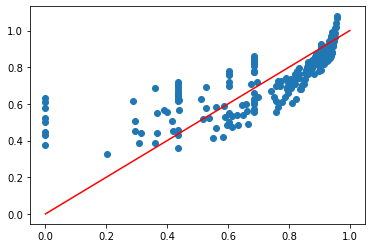

In [11]:
plt.scatter(x=test_y, y=lr_pred_ridge)
plt.plot([0,1],[0,1], color='r')
plt.show()